In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy import stats
import math
%matplotlib inline

# 1. CSV to ARFF

In [2]:
#Since we are using Python, we do  not need to complete this step

# Loading Data

## pandas.read_csv

In [3]:
file_path = "../../data/raw/"

X = pd.read_csv(f"{file_path}x_train_gr_smpl.csv", delimiter=',')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12660 entries, 0 to 12659
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 222.5 MB


In [4]:
# image = X.loc[[600]].values
# image = image[0].reshape((48,48))
# image.shape
# plt.imshow(image)

In [5]:
Y = pd.read_csv(f"{file_path}y_train_smpl.csv", delimiter=',')
Y.columns = ['target']

y0 = pd.read_csv(f"{file_path}y_train_smpl_0.csv", delimiter=',')
y0.columns = ['target']

y1 = pd.read_csv(f"{file_path}y_train_smpl_1.csv", delimiter=',')
y1.columns = ['target']

y2 = pd.read_csv(f"{file_path}y_train_smpl_2.csv", delimiter=',')
y2.columns = ['target']

y3 = pd.read_csv(f"{file_path}y_train_smpl_3.csv", delimiter=',')
y3.columns = ['target']

y4 = pd.read_csv(f"{file_path}y_train_smpl_4.csv", delimiter=',')
y4.columns = ['target']

y5 = pd.read_csv(f"{file_path}y_train_smpl_5.csv", delimiter=',')
y5.columns = ['target']

y6 = pd.read_csv(f"{file_path}y_train_smpl_6.csv", delimiter=',')
y6.columns = ['target']

y7 = pd.read_csv(f"{file_path}y_train_smpl_7.csv", delimiter=',')
y7.columns = ['target']

y8 = pd.read_csv(f"{file_path}y_train_smpl_8.csv", delimiter=',')
y8.columns = ['target']

y9 = pd.read_csv(f"{file_path}y_train_smpl_9.csv", delimiter=',')
y9.columns = ['target']

Y.tail()

,target
12655,9
12656,9
12657,9
12658,9
12659,9


# Create datasets

In [6]:
train_smpl_0 = pd.concat([X, y0], axis=1)
train_smpl_1 = pd.concat([X, y1], axis=1)

In [7]:
train_smpl_2 = pd.concat([X, y2], axis=1)
train_smpl_3 = pd.concat([X, y3], axis=1)

In [8]:
train_smpl_4 = pd.concat([X, y4], axis=1)
train_smpl_5 = pd.concat([X, y5], axis=1)

In [9]:
train_smpl_6 = pd.concat([X, y6], axis=1)
train_smpl_7 = pd.concat([X, y7], axis=1)

In [10]:
train_smpl_8 = pd.concat([X, y8], axis=1)
train_smpl_9 = pd.concat([X, y9], axis=1)

In [11]:
train_smpl = pd.concat([X, Y], axis=1)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0,0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0,0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0,0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0,0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0,0


# 2. Data Randomisation

## sklearn.utils.suffle

In [12]:
train_smpl = shuffle(train_smpl, random_state=42)
train_smpl_0 = shuffle(train_smpl_0, random_state=42)
train_smpl_1 = shuffle(train_smpl_1, random_state=42)
train_smpl_2 = shuffle(train_smpl_2, random_state=42)
train_smpl_3 = shuffle(train_smpl_3, random_state=42)
train_smpl_4 = shuffle(train_smpl_4, random_state=42)
train_smpl_5 = shuffle(train_smpl_5, random_state=42)
train_smpl_6 = shuffle(train_smpl_6, random_state=42)
train_smpl_7 = shuffle(train_smpl_7, random_state=42)
train_smpl_8 = shuffle(train_smpl_8, random_state=42)
train_smpl_9 = shuffle(train_smpl_9, random_state=42)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
1236,25.0,24.0,28.0,27.0,24.0,22.0,22.0,22.0,21.0,21.0,...,34.0,33.0,34.0,36.0,35.0,35.0,34.0,34.0,35.0,0
8847,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,241.0,230.0,237.0,227.0,241.0,241.0,239.0,241.0,237.0,5
11285,34.0,34.0,34.0,33.0,32.0,31.0,31.0,30.0,30.0,30.0,...,16.0,14.0,12.0,11.0,11.0,11.0,13.0,17.0,19.0,8
12423,63.0,66.0,70.0,81.0,77.0,72.0,62.0,61.0,60.0,62.0,...,123.0,77.0,47.0,44.0,43.0,42.0,55.0,71.0,68.0,9
10020,38.0,39.0,40.0,50.0,61.0,72.0,93.0,138.0,185.0,233.0,...,62.0,68.0,68.0,81.0,98.0,86.0,73.0,68.0,65.0,6


# class distribution

(array([1410.,    0., 1860.,    0.,  420.,    0.,    0., 1320.,    0.,
        2100.,    0., 2160.,    0.,    0.,  780.,    0.,  240.,    0.,
        2070.,    0.,  300.]),
 array([0.        , 0.42857143, 0.85714286, 1.28571429, 1.71428571,
        2.14285714, 2.57142857, 3.        , 3.42857143, 3.85714286,
        4.28571429, 4.71428571, 5.14285714, 5.57142857, 6.        ,
        6.42857143, 6.85714286, 7.28571429, 7.71428571, 8.14285714,
        8.57142857, 9.        ]),
 <a list of 21 Patch objects>)

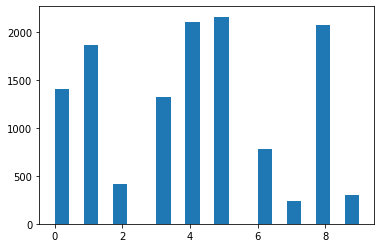

In [13]:
#train_smpl.hist(column='target')
plt.hist(Y['target'], bins='auto')

In [14]:
train_smpl.target.value_counts()

5    2160
4    2100
8    2070
1    1860
0    1410
3    1320
6     780
2     420
9     300
7     240
Name: target, dtype: int64

# 3. Reducing the size

#### Because the data runs the data as a Python file, we do not need to reduce the size of our data set. 



In [15]:
train_smpl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12660 entries, 1236 to 7270
Columns: 2305 entries, 0 to target
dtypes: float64(2304), int64(1)
memory usage: 222.7 MB


In [16]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import make_pipeline

In [17]:
# ros = RandomOverSampler(random_state=0)
# X_oversampled, y_oversampled = ros.fit_resample(X, Y['target'])
# plt.hist(y_oversampled, bins='auto')

(array([1000.,    0., 1000.,    0., 1000.,    0., 1000.,    0., 1000.,
           0.,    0., 1000.,    0., 1000.,    0., 1000.,    0., 1000.,
           0., 1000.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

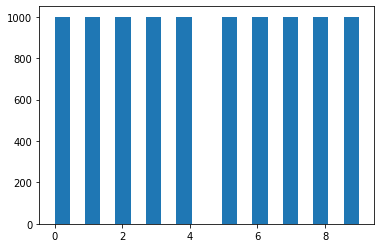

In [18]:

oversample_ratio={2: 1000,  6: 1000, 7: 1000, 9: 1000}
undersample_ratio={0: 1000, 1: 1000,  3: 1000, 4: 1000, 5: 1000, 8: 1000}
pipe = make_pipeline(SMOTE(sampling_strategy=oversample_ratio, n_jobs=7), NearMiss(sampling_strategy=undersample_ratio, n_jobs=7))

X_resampled, y_resampled = pipe.fit_resample(X, Y['target'])
plt.hist(y_resampled, bins='auto')

In [19]:

# rus = RandomUnderSampler(random_state=0)
# X_undersampled, y_undersampled = rus.fit_sample(X, Y)
# plt.hist(y_undersampled, bins='auto')

In [20]:
# X_oversampled = pd.DataFrame(data=X_oversampled)
# y_oversampled = pd.DataFrame(data=y_oversampled)
# y_oversampled.columns=(['target'])
# train_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)
# train_oversampled = shuffle(train_oversampled, random_state=42)
# train_oversampled.info()

In [21]:
X_resampled = pd.DataFrame(data=X_resampled)
y_resampled = pd.DataFrame(data=y_resampled)
y_resampled.columns=(['target'])
train_resampled = pd.concat([X_resampled, y_resampled], axis=1)
train_resampled = shuffle(train_resampled, random_state=42)
train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 6252 to 7270
Columns: 2305 entries, 0 to target
dtypes: float64(2304), int64(1)
memory usage: 175.9 MB


In [22]:
# X_undersampled = pd.DataFrame(data=X_undersampled)
# y_undersampled = pd.DataFrame(data=y_undersampled)
# y_undersampled.columns=(['target'])
# train_undersampled = pd.concat([X_undersampled, y_undersampled], axis=1)
# train_undersampled = shuffle(train_undersampled, random_state=42)
# train_undersampled.info()

# 4 - 6: NB, Features/Attributes Selection, & Improving #5's Classification  

## correlation matrix

%matplotlib inline

#plt.matshow(train_smpl.corr())
#plt.show()

In [23]:
print(f"train_smpl shape:{train_smpl.shape}")

best_20 = SelectKBest(chi2, k=20).fit_transform(train_resampled[train_resampled.columns[:2303]], train_resampled['target'])
best_20 = pd.DataFrame(best_20)
train_smpl_20 = pd.concat([best_20, train_resampled['target']], axis=1)
print(f"train_smpl_20 shape:{train_smpl_20.shape}")

best_50 = SelectKBest(chi2, k=50).fit_transform(train_resampled[train_resampled.columns[:2303]], train_resampled['target'])
best_50 = pd.DataFrame(best_50)
train_smpl_50 = pd.concat([best_50, train_resampled['target']], axis=1)
print(f"train_smpl_50 shape:{train_smpl_50.shape}")

best_100 = SelectKBest(chi2, k=100).fit_transform(train_resampled[train_resampled.columns[:2303]], train_resampled['target'])
best_100 = pd.DataFrame(best_100)
train_smpl_100 = pd.concat([best_100, train_resampled['target']], axis=1)
print(f"train_smpl_100 shape:{train_smpl_100.shape}")


train_smpl shape:(12660, 2305)
train_smpl_20 shape:(10000, 21)
train_smpl_50 shape:(10000, 51)
train_smpl_100 shape:(10000, 101)


# Test Train Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_smpl[train_smpl.columns[:2303]], train_smpl['target'], test_size=0.33, random_state=42)
# X_train_ovr, X_test_ovr, y_train_ovr, y_test_ovr = train_test_split(train_oversampled[train_oversampled.columns[:2303]], train_oversampled['target'], test_size=0.33, random_state=42)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(train_resampled[train_resampled.columns[:2303]], train_resampled['target'], test_size=0.33, random_state=42)
# X_train_udr, X_test_udr, y_train_udr, y_test_udr = train_test_split(train_undersampled[train_undersampled.columns[:2303]], train_undersampled['target'], test_size=0.33, random_state=42)

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(train_smpl_20[train_smpl_20.columns[:20]], train_smpl_20['target'], test_size=0.33, random_state=42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(train_smpl_50[train_smpl_50.columns[:50]], train_smpl_50['target'], test_size=0.33, random_state=42)
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(train_smpl_100[train_smpl_100.columns[:100]], train_smpl_100['target'], test_size=0.33, random_state=42)

# Modeling

## 4. Multinomial Naive Bayes model (multi-class classifier)

### Before Features/Attributes Selection

In [25]:
# In regards to problem 4: Because we are not using Weka, we did not need to apply any
# filters to the data before running Naive Bayes

### Full data set

In [26]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.4595500239348971

In [27]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(X_train_ovr, y_train_ovr)
# clf.score(X_test_ovr, y_test_ovr)

### Resampled data set

In [28]:
clf = MultinomialNB()
clf.fit(X_train_res, y_train_res)
clf.score(X_test_res, y_test_res)

0.6484848484848484

In [29]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(X_train_udr, y_train_udr)
# clf.score(X_test_udr, y_test_udr)

In [30]:
#Original data set
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

#Resampled data set
y_pred_res = clf.predict(X_test_res)
conf_mat_res = confusion_matrix(y_test_res, y_pred_res)

In [31]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
        https://stackoverflow.com/a/50386871
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

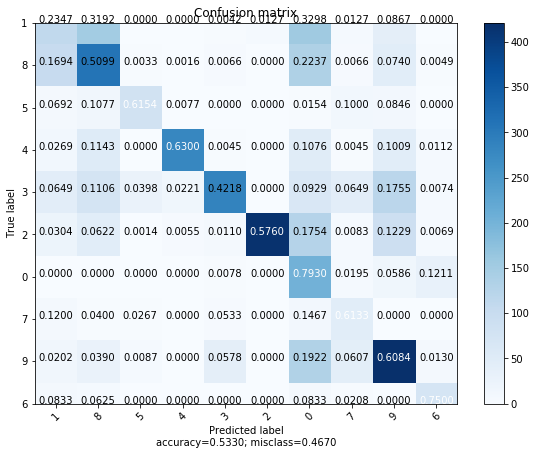

In [54]:
#Original data set
plot_confusion_matrix(conf_mat, target_names=y_test.unique())

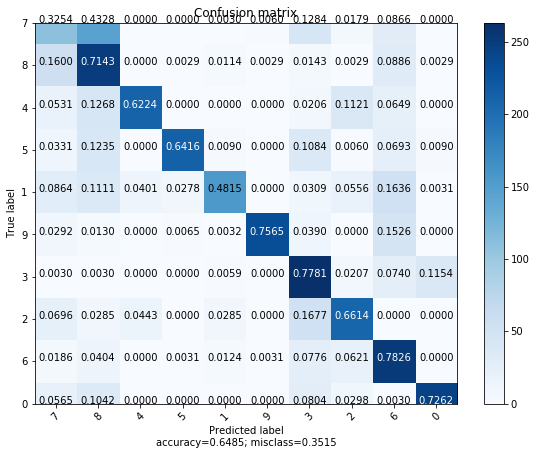

In [33]:
#Resampled data set
plot_confusion_matrix(conf_mat_res, target_names=y_test_res.unique())

In [34]:
# looking for devious class labels that take high numbers of misclassifications
for i in range(conf_mat.shape[1]):
    column = conf_mat.T[i]
    misclassifications = column.sum() - column[i]
    print(i,misclassifications)

0 221
1 372
2 38
3 21
4 62
5 6
6 684
7 124
8 365
9 58


In [35]:
# looking for devious class labels that take high numbers of misclassifications
for i in range(conf_mat_res.shape[1]):
    column = conf_mat_res.T[i]
    misclassifications = column.sum() - column[i]
    print(i,misclassifications)

0 170
1 327
2 27
3 13
4 24
5 4
6 218
7 102
8 231
9 44


## 5. For each of the 10 train_smpl_label files, record the first 10 fields, in order of the absolute correlation value for each street sign.

## Original data set

In [47]:
fileList = [train_smpl_0, train_smpl_1, train_smpl_2, train_smpl_3, train_smpl_4,
            train_smpl_5, train_smpl_6, train_smpl_7, train_smpl_8, train_smpl_9]
for f, file in enumerate(fileList):
    corrArr = []
    for j in file.columns[:-1]:
        corrVal, pVal = stats.pearsonr(file.iloc[:, int(j)], file.iloc[:, -1])
        # Record the absolute value of the correlation
        corrArr.append(math.fabs(corrVal))
    print(f"File {f}:")
    print("10 Largest Correlation Values")
    print(sorted([(x, i) for (i, x) in enumerate(corrArr)], reverse=True)[:10])
    print("10 Smallest Correlation Values")
    print(sorted([(x, i) for (i, x) in enumerate(corrArr)], reverse=True)[-10:])

File 0:
10 Largest Correlation Values
[(0.26979280763893154, 1172), (0.2611057461694063, 1171), (0.25621810693829544, 1468), (0.2532183157062715, 1220), (0.25125887560506865, 1472), (0.24739078010850277, 1221), (0.24628585783977175, 1123), (0.24522400371024533, 1469), (0.2445111050410754, 1419), (0.24358673753047375, 1519)]
10 Smallest Correlation Values
[(0.0021746453030316456, 444), (0.0021551719445530963, 1156), (0.0017883815233756448, 318), (0.0016318487278948685, 491), (0.0011637229483800198, 917), (0.0011256887248363213, 810), (0.0009688396662611938, 418), (0.0008167816078680007, 1581), (0.0003578060426017004, 1630), (1.2299372464829282e-05, 1679)]
File 1:
10 Largest Correlation Values
[(0.25768774160650665, 1094), (0.25720887229012923, 1046), (0.2552925662784085, 1172), (0.25413619996221193, 1142), (0.2538381786322228, 998), (0.24817253165644707, 1190), (0.24760729646175073, 1173), (0.24692877639193458, 997), (0.24635547403592295, 981), (0.24629307447129617, 1045)]
10 Smallest C

## 6. Naive Bayes using select features (20, 50, 100)

### Methods to run NB:

In [48]:
def run_multi_nb_binary(data, num_feat, class_num):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = MultinomialNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial for Binary NB Best {num_feat}0: Class {class_num}: {clf.score(X_test_2, y_test_2)}")

def run_multi_nb(data, num_feat):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = MultinomialNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial NB Best {num_feat}0: {clf.score(X_test_2, y_test_2)}")
    y_pred_multi = clf.predict(X_test_2)
    conf_mat = confusion_matrix(y_test_2, y_pred_multi)
    plot_confusion_matrix(conf_mat, target_names=y_test_2.unique())
    
from sklearn.naive_bayes import GaussianNB
def run_gaus_nb(data, num_feat):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = GaussianNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial NB Best {num_feat}0: {clf.score(X_test_2, y_test_2)}")
    y_pred_multi = clf.predict(X_test_2)
    conf_mat = confusion_matrix(y_test_2, y_pred_multi)
    plot_confusion_matrix(conf_mat, target_names=y_test_2.unique())
    
def run_gaus_nb_binary(data, num_feat, class_num):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = GaussianNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial for Binary NB Best {num_feat}0: Class {class_num}: {clf.score(X_test_2, y_test_2)}")


### 6. Select top 2, 5, and 10 features for all train_smpl_label files to create best 20, 50, and 100 sets for all 10 classes - using original datasets

### Original data set


Binary NB Classifier 20:
 __________________________________
Multinomial for Binary NB Best 20: Class 0: 0.8963618956438487
Multinomial for Binary NB Best 20: Class 1: 0.6845380564863571
Multinomial for Binary NB Best 20: Class 2: 0.8487314504547631
Multinomial for Binary NB Best 20: Class 3: 0.8678793681187171
Multinomial for Binary NB Best 20: Class 4: 0.6354715174724749
Multinomial for Binary NB Best 20: Class 5: 0.8791287697462901
Multinomial for Binary NB Best 20: Class 6: 0.7285782671134514
Multinomial for Binary NB Best 20: Class 7: 0.7259454284346577
Multinomial for Binary NB Best 20: Class 8: 0.7436572522738152
Multinomial for Binary NB Best 20: Class 9: 0.7158927716610819

Multilabel NB Classifier 20:
 __________________________________
Multinomial NB Best 20: 0.5658209669698421


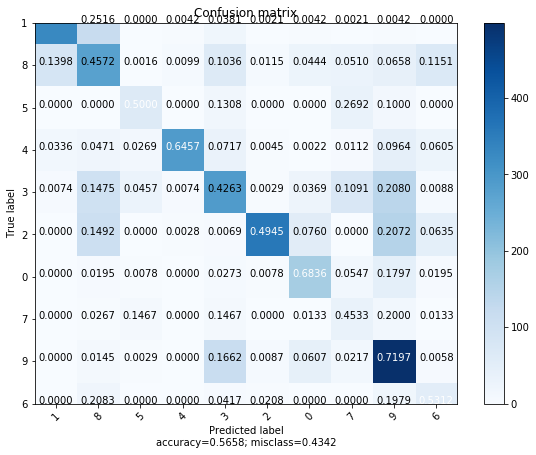


Binary NB Classifier 50:
 __________________________________
Multinomial for Binary NB Best 50: Class 0: 0.9107228338918143
Multinomial for Binary NB Best 50: Class 1: 0.7130205840114887
Multinomial for Binary NB Best 50: Class 2: 0.8451412158927717
Multinomial for Binary NB Best 50: Class 3: 0.9439923408329344
Multinomial for Binary NB Best 50: Class 4: 0.6886069889899473
Multinomial for Binary NB Best 50: Class 5: 0.9188606988989947
Multinomial for Binary NB Best 50: Class 6: 0.7836285303973193
Multinomial for Binary NB Best 50: Class 7: 0.7592149353757779
Multinomial for Binary NB Best 50: Class 8: 0.7680708472953567
Multinomial for Binary NB Best 50: Class 9: 0.7644806127333652

Multilabel NB Classifier 50:
 __________________________________
Multinomial NB Best 50: 0.6074676878889421


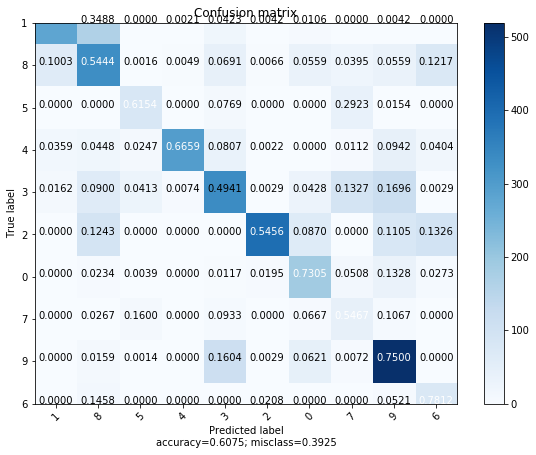


Binary NB Classifier 100:
 __________________________________
Multinomial for Binary NB Best 100: Class 0: 0.9128769746290091
Multinomial for Binary NB Best 100: Class 1: 0.7618477740545716
Multinomial for Binary NB Best 100: Class 2: 0.868358066060316
Multinomial for Binary NB Best 100: Class 3: 0.9595500239348971
Multinomial for Binary NB Best 100: Class 4: 0.757060794638583
Multinomial for Binary NB Best 100: Class 5: 0.9305887984681666
Multinomial for Binary NB Best 100: Class 6: 0.8252752513164193
Multinomial for Binary NB Best 100: Class 7: 0.7805169937769267
Multinomial for Binary NB Best 100: Class 8: 0.7977501196744854
Multinomial for Binary NB Best 100: Class 9: 0.8001436093824796

Multilabel NB Classifier 100:
 __________________________________
Multinomial NB Best 100: 0.6555768310196266


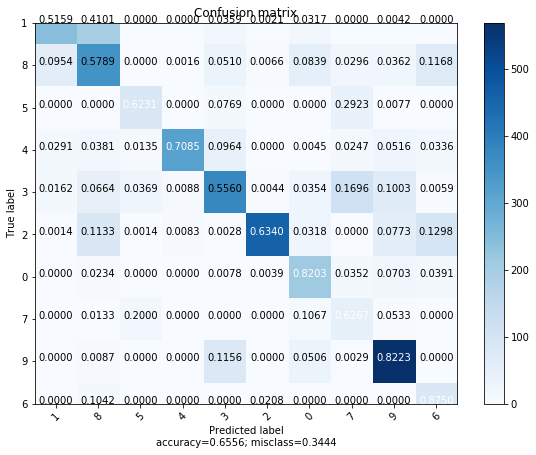


Binary NB Classifier 750:
 __________________________________
Multinomial for Binary NB Best 750: Class 0: 0.8516036381043561
Multinomial for Binary NB Best 750: Class 1: 0.7932024892292963
Multinomial for Binary NB Best 750: Class 2: 0.9344183820009574
Multinomial for Binary NB Best 750: Class 3: 0.9736716132120632
Multinomial for Binary NB Best 750: Class 4: 0.8291048348492102
Multinomial for Binary NB Best 750: Class 5: 0.9241263762565821
Multinomial for Binary NB Best 750: Class 6: 0.9119195787458114
Multinomial for Binary NB Best 750: Class 7: 0.8544758257539492
Multinomial for Binary NB Best 750: Class 8: 0.9207754906653901
Multinomial for Binary NB Best 750: Class 9: 0.8975586404978458

Multilabel NB Classifier 750:
 __________________________________
Multinomial NB Best 750: 0.7501196744853997


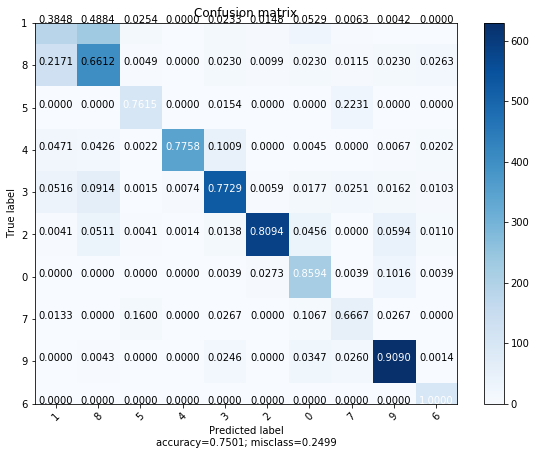

In [49]:
bestSet = [2, 5, 10, 75]

for i, num in enumerate(bestSet):
    k_best_list = pd.DataFrame()
    # Get top k for each 10 classes
    for f, file in enumerate(fileList):
        k_best = SelectKBest(chi2, k=num).fit_transform(file[file.columns[:2303]], file['target'])
        k_best = pd.DataFrame(k_best)
        k_best_list = pd.concat([k_best_list, k_best], axis=1)
        # print(k_best_list.head())

    print(f"\nBinary NB Classifier {num}0:\n __________________________________")
    # run binary NB classifiers for each class
    for f, file in enumerate(fileList):
        k_best_binary = pd.concat([k_best_list, file['target'].reset_index()], axis=1)
        # print(f"K BEST BINARY: {k_best_binary}")
        run_multi_nb_binary(k_best_binary, num, f)

    print(f"\nMultilabel NB Classifier {num}0:\n __________________________________")
    k_best_multi = pd.concat([k_best_list, train_smpl['target'].reset_index()], axis=1)
    # print(f"K BEST MULTI: {k_best_multi}")
    run_multi_nb(k_best_multi, num)
    


## #Bonus part: running tests 5&6 on the resampled smpl_label dataset

## Create the resampled train_smpl_label datasets:

In [39]:
res_binary_targets = []
for i in range(0,10):
    binary_arr = []
    for j in train_resampled['target']:
        if j == i:
            binary_arr.append(0)
        else:
            binary_arr.append(1)
    bin_arr = pd.DataFrame(binary_arr)
    bin_arr.columns = ['target']
    res_binary_targets.append(bin_arr)

#remove multilabel target column
train_res = train_resampled.drop(labels='target', axis=1)
# train_res.head()
# train_resampled['target'].head()

#add binary target for each class
full_res_binary_targets = []
for idx in range(0, 10):
    binary_df = pd.concat([train_res, res_binary_targets[idx]], axis=1)
    full_res_binary_targets.append(binary_df)
#     print(binary_df)
    
# full_res_multi_targets = pd.concat([train_res, res_binary_targets[idx]], axis=1)
    
full_res_binary_targets[:3]
# print(full_res_binary_targets[0])

[               0           1           2           3           4           5  \
 0      19.000000   13.000000   11.000000   11.000000   11.000000   10.000000   
 1      16.000000   16.000000   16.000000   15.000000   15.000000   15.000000   
 2       9.000000   10.000000    9.000000    9.000000    9.000000    9.000000   
 3      15.000000   15.000000   15.000000   15.000000   15.000000   15.000000   
 4      15.000000   14.000000   14.000000   14.000000   14.000000   15.000000   
 ...          ...         ...         ...         ...         ...         ...   
 9995   17.675943   17.793239   18.351887   19.351887   20.351887   22.351887   
 9996  134.518118  113.388875  156.946917  237.596122  164.080546  254.289638   
 9997  116.033367  101.332189  117.468596  151.597644  151.605004  132.682531   
 9998   34.580663   36.649803   35.161327   30.046093   29.000000   30.580663   
 9999    9.907210   10.907210   10.860815    8.953605    8.046395    9.000000   
 
                6         

### #5: Resampled data set

In [46]:
for f, file in enumerate(full_res_binary_targets):
    corrArr = []
    for j in file.columns[:-1]:
        corrVal, pVal = stats.pearsonr(file.iloc[:, int(j)], file.iloc[:, -1])
        # Record the absolute value of the correlation
        corrArr.append(math.fabs(corrVal))
    print(f"File {f}:")
    print("10 Largest Correlation Values")
    print(sorted([(x, i) for (i, x) in enumerate(corrArr)], reverse=True)[:10])
    print("10 Smallest Correlation Value")
    print(sorted([(x, i) for (i, x) in enumerate(corrArr)], reverse=True)[-10:])

File 0:
10 Largest Correlation Values
[(0.03120092987692286, 1330), (0.031114679302398227, 1378), (0.030648651376495615, 946), (0.03050000609907486, 1359), (0.030498763528204957, 1172), (0.02998218929126355, 1268), (0.02992420993500808, 1317), (0.029831464242265262, 898), (0.029765282079400518, 1220), (0.029736383025739065, 2294)]
File 1:
10 Largest Correlation Values
[(0.03126913046227367, 938), (0.030726069790344604, 1791), (0.030238310086729493, 891), (0.030133719954723904, 1792), (0.030056615876241855, 890), (0.029905438953267204, 937), (0.02982003652974284, 985), (0.02938538985472377, 935), (0.02935240372136114, 984), (0.029349283878638305, 1840)]
File 2:
10 Largest Correlation Values
[(0.029322140158682588, 945), (0.029057437624735265, 993), (0.02890355267205017, 1275), (0.028880967511785434, 897), (0.02817444172375954, 1227), (0.028068634882870303, 946), (0.028060762657045987, 1323), (0.027770660851203912, 733), (0.027666869673083534, 734), (0.027499345123748905, 685)]
File 3:
1

KeyboardInterrupt: 

### #6: Resampled data set


Binary NB Classifier 10:
 __________________________________
Multinomial for Binary NB Best 10: Class 0: 0.9984848484848485
Multinomial for Binary NB Best 10: Class 0: 0.5693939393939393
Multinomial for Binary NB Best 10: Class 1: 0.9990909090909091
Multinomial for Binary NB Best 10: Class 1: 0.5690909090909091
Multinomial for Binary NB Best 10: Class 2: 1.0
Multinomial for Binary NB Best 10: Class 2: 0.5590909090909091
Multinomial for Binary NB Best 10: Class 3: 1.0
Multinomial for Binary NB Best 10: Class 3: 0.5606060606060606
Multinomial for Binary NB Best 10: Class 4: 0.9975757575757576
Multinomial for Binary NB Best 10: Class 4: 0.6551515151515152
Multinomial for Binary NB Best 10: Class 5: 1.0
Multinomial for Binary NB Best 10: Class 5: 0.6527272727272727
Multinomial for Binary NB Best 10: Class 6: 1.0
Multinomial for Binary NB Best 10: Class 6: 0.6527272727272727
Multinomial for Binary NB Best 10: Class 7: 1.0
Multinomial for Binary NB Best 10: Class 7: 0.6290909090909091
Multi

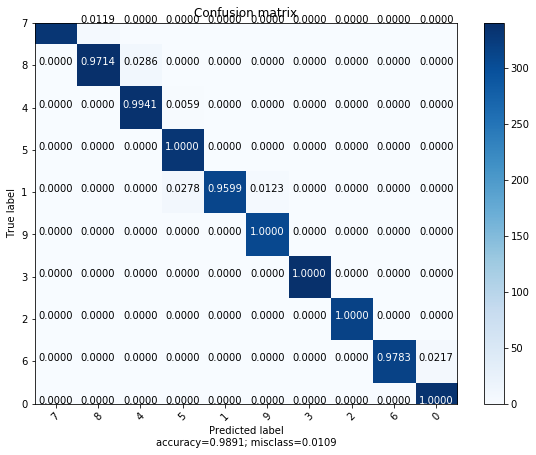

MULTINOMIAL: 

Multinomial NB Best 10: 0.2684848484848485


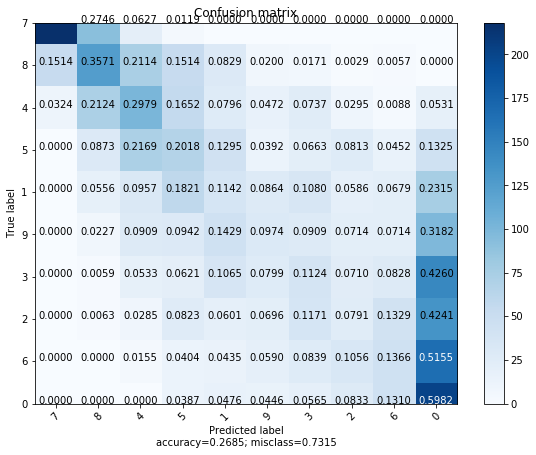


Binary NB Classifier 20:
 __________________________________
Multinomial for Binary NB Best 20: Class 0: 0.9960606060606061
Multinomial for Binary NB Best 20: Class 0: 0.5151515151515151
Multinomial for Binary NB Best 20: Class 1: 0.9854545454545455
Multinomial for Binary NB Best 20: Class 1: 0.5615151515151515
Multinomial for Binary NB Best 20: Class 2: 0.9748484848484849
Multinomial for Binary NB Best 20: Class 2: 0.5333333333333333
Multinomial for Binary NB Best 20: Class 3: 0.9784848484848485
Multinomial for Binary NB Best 20: Class 3: 0.573030303030303
Multinomial for Binary NB Best 20: Class 4: 0.9921212121212121
Multinomial for Binary NB Best 20: Class 4: 0.5533333333333333
Multinomial for Binary NB Best 20: Class 5: 1.0
Multinomial for Binary NB Best 20: Class 5: 0.6048484848484849
Multinomial for Binary NB Best 20: Class 6: 1.0
Multinomial for Binary NB Best 20: Class 6: 0.6421212121212121
Multinomial for Binary NB Best 20: Class 7: 1.0
Multinomial for Binary NB Best 20: Clas

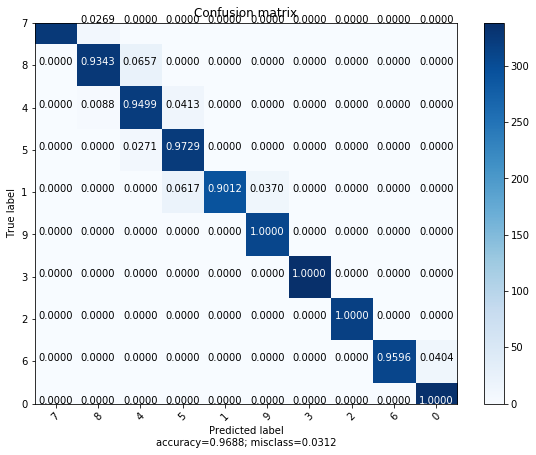

MULTINOMIAL: 

Multinomial NB Best 20: 0.26696969696969697


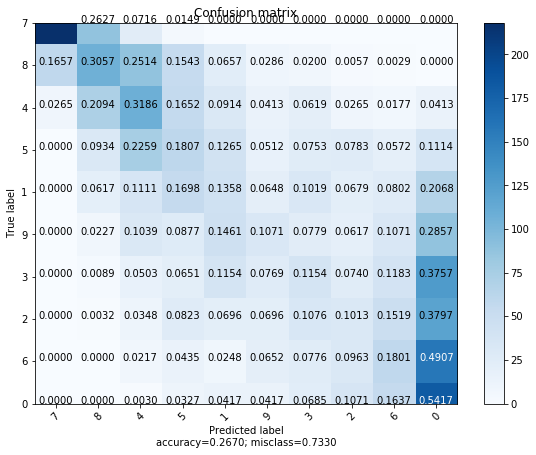


Binary NB Classifier 50:
 __________________________________
Multinomial for Binary NB Best 50: Class 0: 0.9912121212121212
Multinomial for Binary NB Best 50: Class 0: 0.4624242424242424
Multinomial for Binary NB Best 50: Class 1: 0.9490909090909091
Multinomial for Binary NB Best 50: Class 1: 0.5512121212121213
Multinomial for Binary NB Best 50: Class 2: 0.9257575757575758
Multinomial for Binary NB Best 50: Class 2: 0.5284848484848484
Multinomial for Binary NB Best 50: Class 3: 0.9490909090909091
Multinomial for Binary NB Best 50: Class 3: 0.5984848484848485
Multinomial for Binary NB Best 50: Class 4: 0.9878787878787879
Multinomial for Binary NB Best 50: Class 4: 0.4778787878787879
Multinomial for Binary NB Best 50: Class 5: 0.98
Multinomial for Binary NB Best 50: Class 5: 0.6160606060606061
Multinomial for Binary NB Best 50: Class 6: 0.9781818181818182
Multinomial for Binary NB Best 50: Class 6: 0.5924242424242424
Multinomial for Binary NB Best 50: Class 7: 0.99
Multinomial for Binar

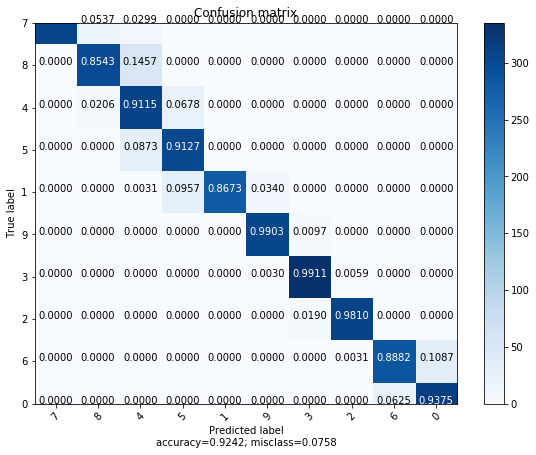

MULTINOMIAL: 

Multinomial NB Best 50: 0.2684848484848485


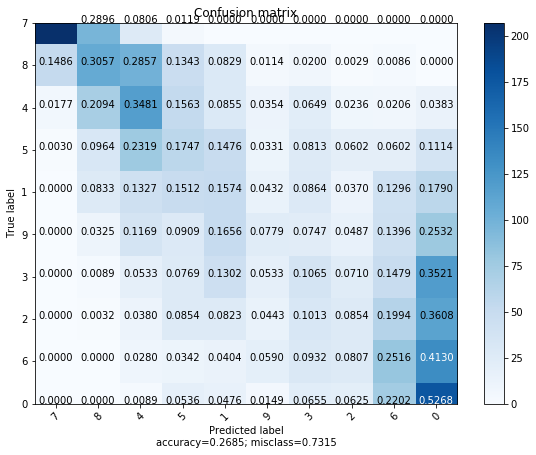


Binary NB Classifier 100:
 __________________________________
Multinomial for Binary NB Best 100: Class 0: 0.6378787878787879
Multinomial for Binary NB Best 100: Class 0: 0.44333333333333336
Multinomial for Binary NB Best 100: Class 1: 0.9048484848484849
Multinomial for Binary NB Best 100: Class 1: 0.5548484848484848
Multinomial for Binary NB Best 100: Class 2: 0.8790909090909091
Multinomial for Binary NB Best 100: Class 2: 0.5212121212121212
Multinomial for Binary NB Best 100: Class 3: 0.9084848484848485
Multinomial for Binary NB Best 100: Class 3: 0.5996969696969697
Multinomial for Binary NB Best 100: Class 4: 0.6709090909090909
Multinomial for Binary NB Best 100: Class 4: 0.476969696969697
Multinomial for Binary NB Best 100: Class 5: 0.9272727272727272
Multinomial for Binary NB Best 100: Class 5: 0.5960606060606061
Multinomial for Binary NB Best 100: Class 6: 0.9336363636363636
Multinomial for Binary NB Best 100: Class 6: 0.5666666666666667
Multinomial for Binary NB Best 100: Class

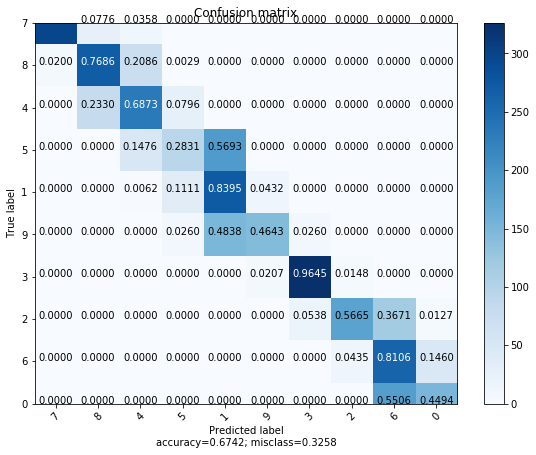

MULTINOMIAL: 

Multinomial NB Best 100: 0.25545454545454543


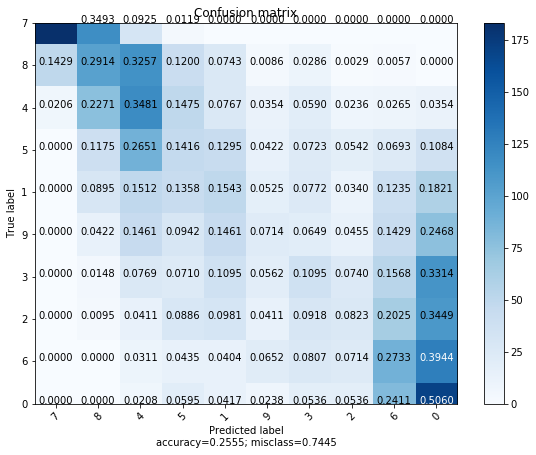

In [53]:
bestSet = [1, 2, 5, 10]

for i, num in enumerate(bestSet):
    k_best_list = pd.DataFrame()
    # Get top k for each 10 classes
    for f, file in enumerate(full_res_binary_targets):
        k_best = SelectKBest(chi2, k=num).fit_transform(file[file.columns[:2303]], file['target'])
        k_best = pd.DataFrame(k_best)
        k_best_list = pd.concat([k_best_list, k_best], axis=1)
#     print(k_best_list)

    print(f"\nBinary NB Classifier {num}0:\n __________________________________")
    # run binary NB classifiers for each class
    for f, file in enumerate(full_res_binary_targets):
        k_best_binary = pd.concat([k_best_list, file['target'].reset_index()], axis=1)
#         print(f"K BEST BINARY: {kbb}")
#         print("GAUSSIAN: \n")
        run_gaus_nb_binary(k_best_binary, num, f)
#         print("MULTINOMIAL: \n")
        run_multi_nb_binary(k_best_binary, num, f)

    print(f"\nMultilabel NB Classifier {num}0:\n __________________________________")
    k_best_multi = pd.concat([k_best_list, train_resampled['target'].reset_index()], axis=1)
#     print(f"K BEST MULTI: {kbm}")
    print("GAUSSIAN: \n")
    run_gaus_nb(k_best_multi, num)
    print("MULTINOMIAL: \n")
    run_multi_nb(k_best_multi, num)

# Analysis for 4 & 7

### 4. Explain the reason for choosing and using these filters. Once you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes (as given by the Weka Summary and the confusion matrix).

#### Since we are not using Weka, we did not need to apply any filters to the data before running Naive Bayes.

### 7. What kind of information about this data set did you learn, as a result of the above experiments? You should ask questions such as: Which streets signs are harder to recognise? Which street signs are most easily confused? Which attributes (fields) are more reliable and which are less reliable in classification of street signs? What was the purpose of Tasks 5 and 6? What would happen if the data sets you used in Tasks 4, 5 and 6 were not randomised? What would happen if there is cross-correlation between the non-class attributes? You will get more marks for more interesting and ``out of the box” questions and answers. Explain your conclusions logically and formally, using the material from the lecture notes and from your own reading to interpret the results that Weka produces.

#### Analysis....

## Conclusions from initial experiments (q7)

Using the multilabel confusion matrix, it is apparent that the multinomial Naïve Bayes classifier struggled with some classes, predicting them incorrectly most of the time. 

In particular, class 8 was more often classified as class 1 (probability 0.278), class 7 (probability 0.2023) and class 6 (probability 0.1974) before itself (probability 0.1283).

//It looks like the classifier was confused by ...



The strongest misclassification in the matrix is true members of class 3 being classified as class 7 (probability 0.2023). However, there is relatively very little of the reverse misclassification (true class 7 predicted as class 3).

//^^ investigate this?



Class 7 punches above its weight as the most abundant misclassification which is perhaps due to the relative infrequency of data for class 7. There must be some other factor, as there are less populated classes.



## Complex Bayesian Networks

scikit learn has naive bayes builtin, but not the more complex networks. Weka can be called on to fill the gap.

### K2 Algorithm

In [42]:
import weka.core.jvm as jvm

jvm.start()

ModuleNotFoundError: No module named 'weka'

In [ ]:
# I added the str call to this line (HM):
# arffList.append("@attribute " + str(df.columns[i]) + " real\n") 

# ---

# https://github.com/saurabhnagrecha/Pandas-to-ARFF

# MIT License

# Copyright (c) [2015] [Saurabh Nagrecha]

# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


import numpy as np

def pandas2arff(df,filename,wekaname = "pandasdata",cleanstringdata=True,cleannan=True):
    """
    converts the pandas dataframe to a weka compatible file
    df: dataframe in pandas format
    filename: the filename you want the weka compatible file to be in
    wekaname: the name you want to give to the weka dataset (this will be visible to you when you open it in Weka)
    cleanstringdata: clean up data which may have spaces and replace with "_", special characters etc which seem to annoy Weka. 
                     To suppress this, set this to False
    cleannan: replaces all nan values with "?" which is Weka's standard for missing values. 
              To suppress this, set this to False
    """
    import re
    
    def cleanstring(s):
        if s!="?":
            return re.sub('[^A-Za-z0-9]+', "_", str(s))
        else:
            return "?"
            
    dfcopy = df #all cleaning operations get done on this copy

    
    if cleannan!=False:
        dfcopy = dfcopy.fillna(-999999999) #this is so that we can swap this out for "?"
        #this makes sure that certain numerical columns with missing values don't get stuck with "object" type
 
    f = open(filename,"w")
    arffList = []
    arffList.append("@relation " + wekaname + "\n")
    #look at each column's dtype. If it's an "object", make it "nominal" under Weka for now (can be changed in source for dates.. etc)
    for i in range(df.shape[1]):
        if dfcopy.dtypes[i]=='O' or (df.columns[i] in ["Class","CLASS","class"]):
            if cleannan!=False:
                dfcopy.iloc[:,i] = dfcopy.iloc[:,i].replace(to_replace=-999999999, value="?")
            if cleanstringdata!=False:
                dfcopy.iloc[:,i] = dfcopy.iloc[:,i].apply(cleanstring)
            _uniqueNominalVals = [str(_i) for _i in np.unique(dfcopy.iloc[:,i])]
            _uniqueNominalVals = ",".join(_uniqueNominalVals)
            _uniqueNominalVals = _uniqueNominalVals.replace("[","")
            _uniqueNominalVals = _uniqueNominalVals.replace("]","")
            _uniqueValuesString = "{" + _uniqueNominalVals +"}" 
            arffList.append("@attribute " + df.columns[i] + _uniqueValuesString + "\n")
        else:
            arffList.append("@attribute " + str(df.columns[i]) + " real\n") 
            #even if it is an integer, let's just deal with it as a real number for now
    arffList.append("@data\n")           
    for i in range(dfcopy.shape[0]):#instances
        _instanceString = ""
        for j in range(df.shape[1]):#features
                if dfcopy.dtypes[j]=='O':
                    _instanceString+="\"" + str(dfcopy.iloc[i,j]) + "\""
                else:
                    _instanceString+=str(dfcopy.iloc[i,j])
                if j!=dfcopy.shape[1]-1:#if it's not the last feature, add a comma
                    _instanceString+=","
        _instanceString+="\n"
        if cleannan!=False:
            _instanceString = _instanceString.replace("-999999999.0","?") #for numeric missing values
            _instanceString = _instanceString.replace("\"?\"","?") #for categorical missing values
        arffList.append(_instanceString)
    f.writelines(arffList)
    f.close()
    del dfcopy
    return True

In [ ]:
import weka.core.classes as wkcore
from weka.classifiers import Classifier
import os

# cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])

cmdline = 'weka.classifiers.bayes.BayesNet -D -Q weka.classifiers.bayes.net.search.local.TAN -- -S BAYES -E weka.classifiers.bayes.net.estimate.SimpleEstimator -- -A 0.5'
classifier = wkcore.from_commandline(cmdline, classname="weka.classifiers.Classifier")
# classifier.build_classifier(iris_data)

# weka.classifiers.bayes.BayesNet -D -Q weka.classifiers.bayes.net.search.local.TAN -- -S BAYES -E weka.classifiers.bayes.net.estimate.SimpleEstimator -- -A 0.5
print(classifier.options)

# Attempt to convert type formats without intermediate file (failed)
# from scipy.io import arff
# from io import StringIO
# x_train_20_str = StringIO(X_train_20)
# data_xtr20, meta_xtr20 = arff.loadarff(X_train_20)
# df_data = pd.DataFrame(data_xtr20)

pandas2arff(X_train_20, 'pandasdata.arff')

# receive arff
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")
arffData = loader.load_file(os.getcwd() + '/' + 'pandasdata.arff')
arffData.class_is_last()

# clean up
os.remove('pandasdata.arff')

# classifier.build_classifier(arffData) #TODO hama fix "class is numeric" error that this spews

# print(arffData)

## 10. Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=[0, 1])

# pca = PCA(n_components=50)
# smpl_data = pd.DataFrame(pca.fit_transform(train_resampled[train_resampled.columns[:-1]]))
# smpl_data = pd.DataFrame(scaler.fit_transform(smpl_data))
# smpl_data["target"] = train_smpl["target"]

# Training sample for train_smpl

smpl_data = train_smpl.copy()

kmeans = KMeans(n_clusters=10, random_state=2)
smpl_data["cluster"] = kmeans.fit_predict(smpl_data[smpl_data.columns[:-1]])
# smpl_data["w_class_attribute"] = kmeans.fit_predict(smpl_data[smpl_data.columns[:-1]])

resampled_data = train_resampled.copy()

kmeans = KMeans(n_clusters=10, random_state=2)
resampled_data["cluster"] = kmeans.fit_predict(resampled_data[resampled_data.columns[:-1]])
# resampled_data["w_class_attribute"] = kmeans.fit_predict(resampled_data[resampled_data.columns[:-1]])

In [ ]:
from sklearn.cluster import KMeans

# Training sample for train_smpl_<label> 
training_dataframe = [train_smpl_0.copy(), train_smpl_1.copy(), train_smpl_2.copy(), train_smpl_3.copy(), train_smpl_4.copy(),
                      train_smpl_5.copy(), train_smpl_6.copy(), train_smpl_7.copy(), train_smpl_8.copy(), train_smpl_9.copy()]

kmeans = KMeans(n_clusters=2, random_state=2)
for dataframe in training_dataframe:
    dataframe["cluster"] = kmeans.fit_predict(dataframe[dataframe.columns[:-1]])

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

#Fitting the PCA algorithm with our Data
# pca = PCA().fit(data_rescaled)

#Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)') #for each component
# plt.title('Pulsar Dataset Explained Variance')
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# print(target.groupby(['target']).count())
# result_class_attribute = result.groupby(['target', 'cluster_class_attribute']).count()
# result_cluster["class"] = result_class_attribute["cluster"]

def plot_clustering(result, nb_attribute, nb_cluster, name_cluster="cluster"):
    df = result[result.columns[-3:]]
    result_cluster = df.groupby(['target', name_cluster]).count()
    result_cluster.reset_index(inplace=True)
    result_data = []
    for i in range(0, nb_cluster):
        result_data.append([])
        if name_cluster == "w_class_attribute":
            data = result_cluster[result_cluster.w_class_attribute == i].drop([name_cluster], axis=1).to_dict('split')['data']
        else:
            data = result_cluster[result_cluster.cluster == i].drop([name_cluster], axis=1).to_dict('split')['data']
        data = [{x[0]: x[1]} for x in data]
        data = dict(pair for d in data for pair in d.items())
        for j in range(0, nb_attribute):
            result_data[i].append(data[j] if j in data else 0)

    data = np.array(result_data)

    color_list = ['#FC7A57', '#EEFC57', '#5E5B52', '#8DB580', '#BBE5ED', '#4281A4', '#BAD9B5', '#CA7DF9', '#04E762', '#723D46']

    X = np.arange(data.shape[1])
    for i in range(data.shape[0]):
        plt.bar(X, data[i],
            bottom = np.sum(data[:i], axis = 0),
            color = color_list[i % len(color_list)],
               label=f"Cluster {i}")

    plt.legend(loc="best", bbox_to_anchor=(1.0, 1.00))
    plt.show()

In [ ]:
"""
# Plot train_smpl_<label> clusters
i = 0
for dataframe in training_dataframe:
    print(f"Training sample n°{i}:")
    plot_clustering(dataframe, 10, 2)
    i += 1
"""
# Plot train_smpl clusters
print(f"Training sample all data (without class attribute):")
plot_clustering(smpl_data, 10, 10)
# print(f"Training sample all data (with class attribute):")
# plot_clustering(smpl_data, 10, 10, 'w_class_attribute')

# Plot train_smpl resampled clusters
print(f"Training resample data (without class attribute):")
plot_clustering(resampled_data, 10, 10)
# print(f"Training resample data (with class attribute):")
# plot_clustering(resampled_data, 10, 10, 'w_class_attribute')

## 11. Clustering notes

The clustering classification is not as good as the Gaussian Naives model. It struggle with attributing the classes to the good target.

When it is trained with the individual sample the two cluster doesn't separate the specific class from the other classes. But for the sample n°2 all the class is in one cluster, but the cluster also contains a lot of other classes.

The classification obtained with and without class attribute are the same. Maybe we should change weight on the class attribute so there is more impact on the distribution.

I did some tests with using PCA (Principal component analysis) which convert a set of observations of possibly correlated variables to reduce the number of attributes of the samples. And some other with the MinMax scaler. But theses preprocess didn't improve the result, the cluster are still very distributed among the targets.

When we are comparing the result between basic sample of all data and the resample one, neither of which seems to be better than the other.

But we can notice in the resample result, that for the target 6 and 7, 9 they have almost a dedicated a cluster (corresponding in the order of cluster 7, 9 and 6)

## 12. Other clustering algorithms

In [ ]:
from sklearn.cluster import DBSCAN

smpl_data = train_resampled.copy()

dbscan = DBSCAN(eps=100, min_samples=10)
smpl_data["cluster"] = dbscan.fit_predict(smpl_data[smpl_data.columns[:-1]])

In [ ]:
from sklearn.cluster import Birch

smpl_data = train_resampled.copy()

birch = Birch(threshold=0.5, branching_factor=50, n_clusters=8)
smpl_data["cluster"] = birch.fit_predict(smpl_data[smpl_data.columns[:-1]])

In [ ]:
from sklearn.cluster import MeanShift

print('a')
smpl_data = train_resampled.copy()

mean_shift = MeanShift(bandwidth=100)
smpl_data["cluster"] = mean_shift.fit_predict(smpl_data[smpl_data.columns[:-1]])

In [ ]:
max(dbscan.labels_)

plot_clustering(smpl_data, 10, 10)

## 14. Research Question

### Create datasets that have 1 class removed - original dataset

In [ ]:
import copy
#Remove 2, 9, and 6
rem_images = [2, 9, 6]
train_smpl_copy_2 = copy.deepcopy(train_smpl)
train_smpl_copy_9 = copy.deepcopy(train_smpl)
train_smpl_copy_6 = copy.deepcopy(train_smpl)
dataSet = [train_smpl_copy_2, train_smpl_copy_9, train_smpl_copy_6]
removed_classes = []
for d, data in enumerate (dataSet):
    #Iterate through rows and identify ones that have the key 
    print(f"d: {d}")
    removed_class = []
    for idx, row in data.iterrows():
        if row['target'] == rem_images[d]:
            removed_class.append(row)
            data.drop([idx], inplace=True)
    removed_class_df = pd.DataFrame(removed_class)
    removed_classes.append(removed_class_df)
    print("~~~~NEXT~~~~")

print(f"removed classes: {removed_classes[0]}")
# train_smpl_copy_6.head()
    


In [ ]:
print(f"Train smpl copy 6: {train_smpl_copy_6}")

In [ ]:
print(removed_classes[0].shape)
print(removed_classes[1].shape)
print(removed_classes[2].shape)

print(f"Rem classes: {removed_classes[0]}")
# print(f"Rem classes: {removed_classes[1]}")
# print(f"Rem classes: {removed_classes[2]}")

### Method for plotting frequency of classification

In [ ]:
# Adapted from: https://stackoverflow.com/questions
# /50845998/matplotlib-bar-chart-that-shows-frequency-of-unique-values

def make_plot(title, result):
    plt.hist(result, bins=np.arange(10)-0.5)
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("No of Classifications")
    plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10],label=[0,1,2,3,4,5,6,7,8,9,10])
    plt.show()

### Run Multinomial NB

In [ ]:
# # new instances where we do not know the answer
# Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# # make a prediction
# ynew = model.predict(Xnew)
# # show the inputs and predicted outputs
# for i in range(len(Xnew)):
# 	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

idx = [0,1,2,3,4,5,6,7,8,9]
#Image 2 removed
clf = MultinomialNB()
clf.fit(train_smpl_copy_2.iloc[:,:-1], train_smpl_copy_2.iloc[:,-1])
result_2 = clf.predict(removed_classes[0].iloc[:,:-1])
make_plot("Image 2 Removed - 80 limit lifted", result_2)
print(f"Result 2: {result_2}")


#Image 9 removed
clf = MultinomialNB()
clf.fit(train_smpl_copy_9.iloc[:,:-1], train_smpl_copy_9.iloc[:,-1])
result_9 = clf.predict(removed_classes[1].iloc[:,:-1])
make_plot("Image 9 Removed - Arrow", result_9)
print(f"Result 9: {result_9}")

#Image 6 removed
clf = MultinomialNB()
clf.fit(train_smpl_copy_6.iloc[:,:-1], train_smpl_copy_6.iloc[:,-1])
result_6 = clf.predict(removed_classes[2].iloc[:,:-1])
make_plot("Image 6 Removed - Stop Sign", result_6)
print(f"Result 6: {result_6}")